<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Sebastián Bustos Vásquez</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub. 

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub. 

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

# Agrega tu usuario
sebabustos2001
# Agrega el enlace al repositorio para tus trabajo
https://github.com/sebabustos2001/EIE401---Procesamiento-Digital-Multimedia.git

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2} 
$$

$$
f(z) =  ysin(x) 
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

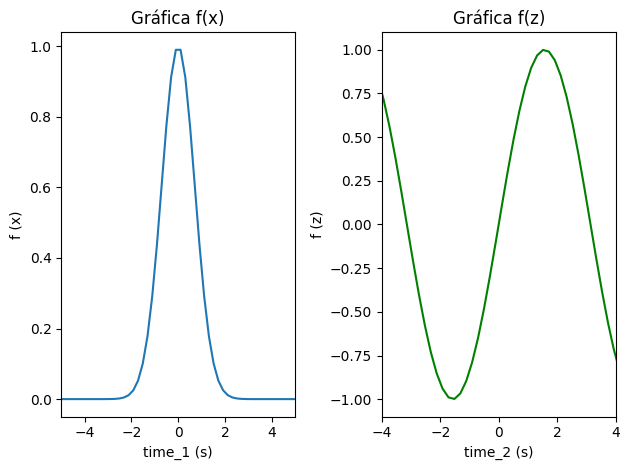

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Puertas Temporales para cada funcion
time_1 = np.linspace(-10, 10, 100)  # (a, b, c) -> (límite inferior, límite superior, separación en cada muestra)
time_2 = np.linspace(-10, 10, 100)
y = 1

# Funciones definidas como variables
f_x = np.exp(-time_1**2)
f_z = y * np.sin(time_2)

# Grafica f(x) 
plt.subplot(1, 2, 1)
plt.plot(time_1, f_x)
plt.title('Gráfica f(x)')
plt.xlabel('time_1 (s)')
plt.ylabel('f (x)')
plt.xlim(-5,5)
plt.legend

# Grafica f(z)
plt.subplot(1, 2, 2)
plt.plot(time_2, f_z, color='green')
plt.title('Gráfica f(z)')
plt.xlabel('time_2 (s)')
plt.ylabel('f (z)')
plt.xlim(-4, 4)
plt.legend

plt.tight_layout()

## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


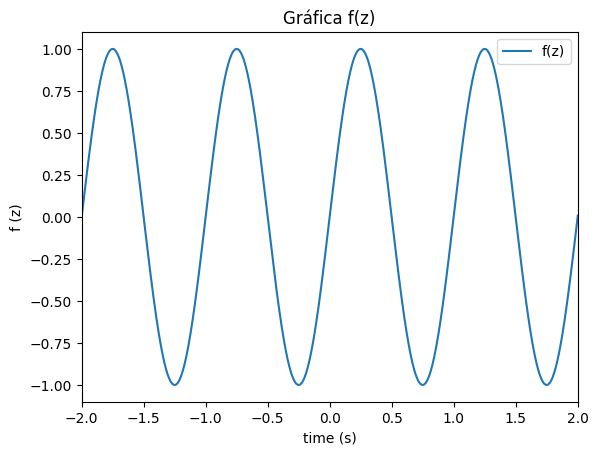

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Puertas Temporales para cada función
time = np.linspace(-4, 4, 5000)  # (a, b, c) -> (límite inferior, límite superior, separación en cada muestra)

# Parámetros de la señal senoidal
amplitud = 1.0
frecuencia = 1.0  # en Hz
fase = 0          # en radianes

# Crear la señal senoidal manualmente
f_z = amplitud * np.sin(2 * np.pi * frecuencia * time + fase)

# Graficar la señal
plt.plot(time, f_z,label='f(z)',)
plt.title('Gráfica f(z)')
plt.xlabel('time (s)')
plt.ylabel('f (z)')
plt.xlim(-2, 2)
plt.legend()
plt.show()

### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


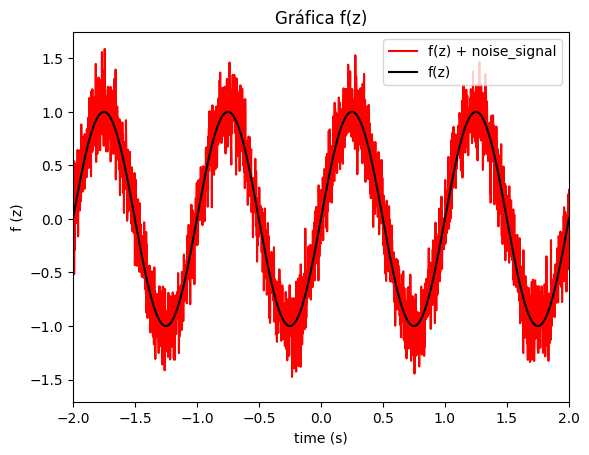

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Puertas Temporales para cada función
time = np.linspace(-4, 4, 5000)  # (a, b, c) -> (límite inferior, límite superior, separación en cada muestra)

# Parámetros de la señal senoidal
amplitud = 1.0
frecuencia = 1.0  # en Hz
fase = 0          # en radianes

# Crear la señal senoidal manualmente
f_z = amplitud * np.sin(2 * np.pi * frecuencia * time + fase)

# Función que genera números aleatorios distribuidos normalmente (gaussiana)
noise_signal = np.random.normal(0, 0.2, 5000)  # (a, b, c) -> (media de la distribución normal, desviación estándar, dimension)

# Suma de señal con ruido a f(z)
f_z_noisy = f_z + noise_signal

# Graficar la señal con ruido
plt.plot(time, f_z_noisy, color='red', label='f(z) + noise_signal')
plt.plot(time, f_z, color='black',label='f(z)',)
plt.title('Gráfica f(z) + ruido gaussiano')
plt.xlabel('time (s)')
plt.ylabel('f (z)')
plt.xlim(-2, 2)
plt.legend()
plt.show()

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

El ruido rosa contiene todos los sonidos del espectro audible para el ser humano, sin embargo, su intensidad disminuye a medida que aumenta la frecuencia. Esta disminución es gradual de tres decibeles por octava. 

Es similar a cómo suenan los instrumentos acústicos, ya que también disminuyen su intensidad a frecuencias más altas. Por esta razón, el ruido rosa se utiliza para probar la calidad acústica de salas de escucha y auditorios, ya que puede revelar características como el tiempo de reverberación y comportamientos no deseados de resonancia.

El espectro del ruido rosa disminuye a 1 dividido por su frecuencia, o sea,  a mayor frecuencia se tiene menos energíaa, a diferencia del ruido gaussiano que se caracteriza por tener una energía similar en cualquier frecuencia.

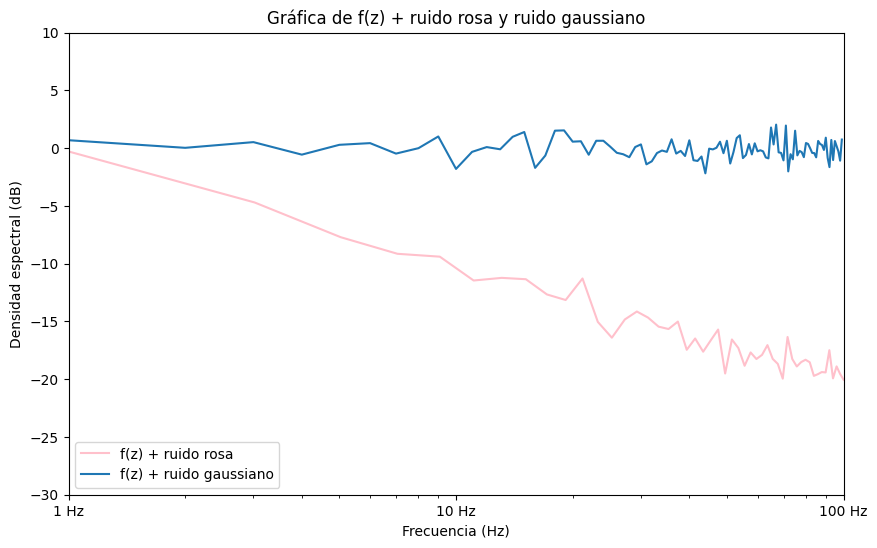

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar ruido rosa
def pink_noise(fs, N):
    f = np.linspace(1, fs / 2, N // 2)
    psd_rosa = 1 / f
    psd_rosa_db = 10 * np.log10(psd_rosa)
    ruido = np.random.normal(0, 1, N // 2)
    psd_rosa_con_ruido = psd_rosa_db + ruido
    return f, psd_rosa_con_ruido

# Parámetros
fs = 200 # frecuencia de muestreo
N = 100     # Dimensión

# Generar ruido rosa
f, psd_rosa_con_ruido = pink_noise(fs, N)

# Generar ruido gaussiano
ruido_gaussiano = 0.8 * np.random.randn(N)

# Graficar
plt.figure(figsize=(10, 6))

# Ruido rosa
plt.plot(f, psd_rosa_con_ruido, label='f(z) + ruido rosa', color='pink')

# Ruido gaussiano
plt.plot(np.arange(N), ruido_gaussiano, label='f(z) + ruido gaussiano')

plt.xscale('log')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral (dB)')
plt.title('Gráfica de f(z) + ruido rosa y ruido gaussiano')
plt.xticks([1, 10, 100], ['1 Hz', '10 Hz', '100 Hz'])
plt.ylim([-30, 10])
plt.xlim([1, 100])
plt.legend(loc='lower left')
plt.show()


## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a

[An Acoustics Primer] https://cmtext.indiana.edu/acoustics/chapter1_waves3.php